## CS 4661 Project
# Predicting Stock Market Prices
Members: Nshan Kazaryan, Bailey Canham, Ly Jacky Nhiayi, Asahel Monroy

In [18]:
# import necessary tools
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt



In [3]:
# read csv file
stock_df = pd.read_csv("https://raw.githubusercontent.com/LyJacky/stocks/4802f4e0f139ee0568afbad309086d90c78a53b7/all_stocks_5yr.csv")
import datetime as dt
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df['date']=stock_df['date'].map(dt.datetime.toordinal)
# gets the top 10 stocks in alphabetical order
# stock_df_top10 sstock_df_aal = stock_df[0:1259]tock_df[0:12590]

In [4]:
# stock_df_top10[::1259]
stock_df_aal = stock_df[0:1259]
stock_df_aal

,date,open,high,low,close,volume,Name
0,734907,15.07,15.12,14.63,14.75,8407500,AAL
1,734910,14.89,15.01,14.26,14.46,8882000,AAL
2,734911,14.45,14.51,14.10,14.27,8126000,AAL
3,734912,14.30,14.94,14.25,14.66,10259500,AAL
4,734913,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,736726,54.00,54.64,53.59,53.88,3623078,AAL
1255,736727,53.49,53.99,52.03,52.10,5109361,AAL
1256,736730,51.99,52.39,49.75,49.76,6878284,AAL
1257,736731,49.32,51.50,48.79,51.18,6782480,AAL


<AxesSubplot:>

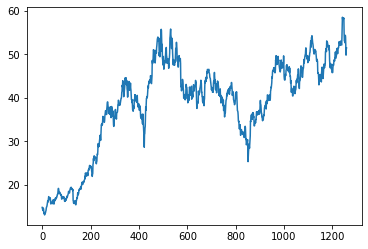

In [10]:
stock_df_aal.close.plot()

array([[-0.14250883, -1.7314021 ],
       [-0.07370646, -1.72570819],
       [-0.18332626, -1.72381022],
       ...,
       [-0.36424475,  1.72859661],
       [-0.37813631,  1.73049458],
       [-0.6589499 ,  1.73239255]])

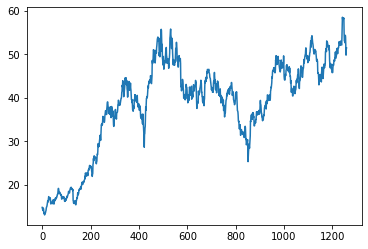

In [28]:
stock_df_aal.head()
feature_cols = ["volume","date"]
X = scale(stock_df_aal[feature_cols])
y = stock_df_aal["close"]
# y = scale(stock_df_aal["close"])
# X = stock_df_aal[feature_cols]
y.plot()
X

[7.92948286 4.35920068 2.56878538 9.9635021  6.34162915 3.23313188
 2.59202757 4.02652253 2.55072682 4.79918526]
4.836419423077397


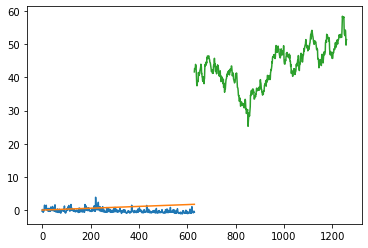

In [29]:
# import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import math

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, 
#                                                     random_state=3)

s_f = .5
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
plt.plot(X_test)
y_test = y[n_train:]
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
y_test.plot()
# print(X_test)
# print(y_test)

y_predict = linear_regression.predict(X_test)
# print(y_predict)
mse_list = cross_val_score(linear_regression, X_test, y_test, cv=10, scoring='neg_mean_squared_error')

mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print(rmse_list.mean())

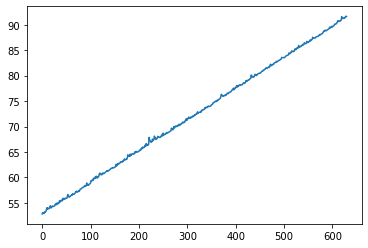

In [30]:
plt.plot(y_predict)

In [27]:
y_test

629     41.68
630     42.70
631     42.52
632     42.67
633     42.88
        ...  
1254    53.88
1255    52.10
1256    49.76
1257    51.18
1258    51.40
Name: close, Length: 630, dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(stock_df[['Name']]).toarray())

stock_df_encode = stock_df.join(encoder_df)

stock_df_encode.drop('Name', axis=1, inplace=True)
stock_df_encode.columns = ['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM']


ValueError: Length mismatch: Expected axis has 511 elements, new values have 10 elements

In [ ]:
old_val = stock_df["close"]

series_shifted = old_val['A'].shift()
series_shifted